Create a linear regression model using tensorflow and keras.
We will use the Boston House Regression Dataset from keras.datasets.

# Import the required libraries



In [ ]:
import os
import numpy as np
import time
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import data
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
class Boston_Housing_ex:
  @staticmethod
  def preprocess_data(X_data):
    """In this function, we use the Normalization layer of keras to normalize
       our feature columns 
      args:
            X_data (numpy array): Input data
      returns:
              normal_layer (layer object): the (fitted) normalization layer
      """
    # Create a normal_layer object adapted to the X_data
    normal_layer = preprocessing.Normalization()
    normal_layer.adapt(X_data)
    return normal_layer

  @staticmethod
  def preprocess_data_numpy(X_data, X_data_test):
    # normalize the X_data manually
    mu  = np.mean(X_data, axis=0)
    std = np.std(X_data, axis=0)
    X_data = (X_data - mu)/std                                                  # axis 0 along the rows, along m
    X_data_test = (X_data_test - mu)/std
    return X_data, X_data_test

# Functions and Classes for eager execution
class Linear_hypothesis_fun(tf.keras.Model):                                    # It inherits the Model class
  def __init__(self, features):
    """Creates the linear model wTx - y. It constructs the linear hypothesis 
       h_w, that we apply to the pair of data (x, y)
    args:
        features (int): size of the sample
    returns:
        hypothesis (float)
     """
    super(Linear_hypothesis_fun, self).__init__()
    self.W = tf.Variable(tf.random.normal([features, 1], stddev=0.05), name='weight', trainable=True) # initialize the weights and bias to random values drawn from normal dist
    self.b = tf.Variable(tf.random.normal([1], stddev=0.05), name='bias', trainable=True) # BEWARE OF THE INITIALIZATION!

  # the hypothesis function class call
  def call(self, inputs):
    """
    args:
        inputs numpy(vector(features, 1)): the example x
    returns:
        hypothesis at (input)
     """
    return inputs @ self.W + self.b      

# The following methods can apply to various hypothesis functions h_w
def loss(hypothesis, measurements, labels): 
  """The loss function
     args:
         measurements numpy(batch_size, num_features): examples
         labes numpy(batch_size, 1): the corresponding labels
     returns:
         the value of the cost function
  """
  return tf.reduce_mean(tf.square(hypothesis(measurements) - labels))           # the loss_fun

def grad(hypothesis, measurements, labels):
  """Compute the gradient for SGD"""
  with tf.GradientTape() as tape:
    loss_fun = loss(hypothesis, measurements, labels)
    thetas = [hypothesis.W, hypothesis.b]                                       # differentiate in respect to thetas. Thetas is a bit arbitrary name, but it is more intuitive to me
    return tape.gradient(loss_fun, thetas)                                      # for a parameter name

def train_model(mydata, n_features, learning_rate, batch, epochs=1000):
  """Creates the model for via the Linear_hypothesis_fun we created
    args: 
      training_set (numpy array): the training set
      train_labels (numpy array): train labels
      n_features (int): number of features
      iterations (int): iterations for the training process
      learing_rate (float): the learning rate for SGD
      batch (int): batch size 
    returns:
      W (numpy): the weights computed after training
      b (numpy): bias vector
    """
  linear_regression = Linear_hypothesis_fun(n_features)                         # create a linear model
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.3, nesterov=True) # set the optimizer
  cost_function_value = []                                                      
  # train loop 
  for epoch in range(epochs):                                                   # full passes on the data
    for iter, (training_set_batch, training_label_batch) in enumerate(dataset.as_numpy_iterator()):
      grads = grad(linear_regression, training_set_batch, training_label_batch) # compute the grads using the GradientTape
      thetas = [linear_regression.W, linear_regression.b]
      optimizer.apply_gradients(zip(grads, thetas))
      # plot the cost function value per epoch (full pass)
      cost_function_value.append(loss(linear_regression, training_set_batch, training_label_batch))
    # print(f"Cost: {cost_function_value[-1]}")
    print(f"Final value: {loss(linear_regression, training_set_batch, training_label_batch)}")
  return linear_regression.W.numpy(), linear_regression.b.numpy(), cost_function_value
# def test_model()                                                              # similar to https://www.tensorflow.org/tutorials/quickstart/advanced
def plot_cost(cost_function_value):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Cost Function")

  plt.plot(cost_function_value, label='mse')
  plt.show()

# Build the model with the Sequential keras model
def build_model(normal_layer, learning_rate):#, feature_col_layer):
  # build a regression model using only one node
  linear_model = keras.Sequential()

  linear_model.add(normal_layer)                                                # the normalization layer
  linear_model.add(keras.layers.Dense(units=1))                                 # add a node

  linear_model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate,
                      momentum=0.3, nesterov=True), loss='mean_squared_error',
                      metrics=[keras.metrics.MeanSquaredError()])
  return linear_model

def train_model_with_fit(model, train_data, train_labels, epochs, batch):
  # train the model using the .fit()
  model_info = model.fit(x=train_data, y=train_labels, batch_size=batch, epochs=epochs)
  model_info_pd = pd.DataFrame(model_info.history)
  mse = model_info_pd["mean_squared_error"]

  return epochs, mse

# We load the dataset through keras load_data function


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
                                        path='boston_housing.npz', test_split=0.2, seed=1)
# Printing dataset information
print(f"Total number of measurements: {X_train.shape[0] + X_test.shape[0]}")
print(f"Total number of features: {X_train.shape[1]}")


Total number of measurements: 506
Total number of features: 13


In [ ]:
# Inspect the data (first five measurements)
print(X_train[5:8])
print(X_train[5:8, :])

[[5.90050e-01 0.00000e+00 2.18900e+01 0.00000e+00 6.24000e-01 6.37200e+00
  9.79000e+01 2.32740e+00 4.00000e+00 4.37000e+02 2.12000e+01 3.85760e+02
  1.11200e+01]
 [3.61500e-02 8.00000e+01 4.95000e+00 0.00000e+00 4.11000e-01 6.63000e+00
  2.34000e+01 5.11670e+00 4.00000e+00 2.45000e+02 1.92000e+01 3.96900e+02
  4.70000e+00]
 [1.35472e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.07200e+00
  1.00000e+02 4.17500e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.76730e+02
  1.30400e+01]]
[[5.90050e-01 0.00000e+00 2.18900e+01 0.00000e+00 6.24000e-01 6.37200e+00
  9.79000e+01 2.32740e+00 4.00000e+00 4.37000e+02 2.12000e+01 3.85760e+02
  1.11200e+01]
 [3.61500e-02 8.00000e+01 4.95000e+00 0.00000e+00 4.11000e-01 6.63000e+00
  2.34000e+01 5.11670e+00 4.00000e+00 2.45000e+02 1.92000e+01 3.96900e+02
  4.70000e+00]
 [1.35472e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.07200e+00
  1.00000e+02 4.17500e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.76730e+02
  1.30400e+01]]


# Standarize the data

In [ ]:
X_train, X_test = Boston_Housing_ex.preprocess_data_numpy(X_train, X_test)



In [ ]:
n_features = X_train.shape[1]
linear_regression = Linear_hypothesis_fun(n_features)
loss_init = loss(linear_regression, X_train.astype('float32'), y_train.astype('float32'))
print(f"Initial value is {loss_init.numpy()}")


test_weight = tf.random.normal([X_train.shape[1], 1], stddev=0.05)
test_bias = tf.random.normal([1], stddev=0.05)

print(test_weight, test_bias)
print(X_train[0, :])
print(tf.reduce_mean(tf.square([X_train[0,:]] @ test_weight + test_bias - y_train[0])))
loss(linear_regression, [X_train[0,:]], y_train[0])

Initial value is 594.724609375
tf.Tensor(
[[ 0.06781923]
 [ 0.01780676]
 [ 0.01121393]
 [ 0.09412405]
 [ 0.03097606]
 [-0.00746674]
 [-0.01865192]
 [ 0.00092726]
 [ 0.04724929]
 [ 0.02575622]
 [-0.02163538]
 [ 0.04666159]
 [ 0.0565212 ]], shape=(13, 1), dtype=float32) tf.Tensor([-0.04831445], shape=(1,), dtype=float32)
[-0.41652309  0.90532196 -1.30133864 -0.27288841 -0.71902501  0.77175804
  0.0647292  -0.28508904 -0.29984129 -1.11407591 -0.04538668  0.45023554
 -0.69132703]
tf.Tensor(806.0019, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=799.9521>

Final value: 320.01470947265625
Final value: 194.48504638671875
Final value: 125.76008605957031
Final value: 87.865478515625
Final value: 66.93278503417969
Final value: 55.38230514526367
Final value: 49.032413482666016
Final value: 45.564857482910156
Final value: 43.69105529785156
Final value: 42.694129943847656
Final value: 42.17573928833008
Final value: 41.91523742675781
Final value: 41.7911262512207
Final value: 41.73712921142578
Final value: 41.717594146728516
Final value: 41.71375274658203
Final value: 41.71603012084961
Final value: 41.71979904174805
Final value: 41.7230224609375
Final value: 41.724979400634766
Final value: 41.7255744934082
Final value: 41.724971771240234
Final value: 41.72343444824219
Final value: 41.72121810913086
Final value: 41.71854782104492
Final value: 41.715614318847656
Final value: 41.712554931640625
Final value: 41.709468841552734
Final value: 41.70642852783203
Final value: 41.70348358154297
Final value: 41.70066833496094
Final value: 41.698001861572266


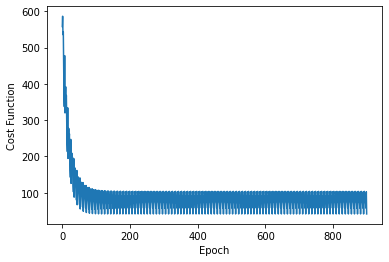

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 532.9988 - mean_squared_error: 532.9988
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 311.7890 - mean_squared_error: 311.7890
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 197.9050 - mean_squared_error: 197.9050
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 140.4191 - mean_squared_error: 140.4191
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 83.8901 - mean_squared_error: 83.8901
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 55.1395 - mean_squared_error: 55.1395
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 38.0800 - mean_squared_error: 38.0800
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 41.4103 - mean_squared_error: 41.4103
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 32.6115 - mean_squared_error: 32.6115
Epoch 10/10

In [ ]:
n_features = X_train.shape[1]
learning_rate = 0.01
batch = 50
epochs=100
train_set = data.Dataset.from_tensor_slices(X_train)
train_labels = data.Dataset.from_tensor_slices(y_train)
dataset = data.Dataset.zip((train_set, train_labels)).batch(batch)
# dataset = dataset.shuffle(buffer_size=20).batch(batch)
# Run on GPU, if available:
with tf.device("/gpu:0"):
  W, b, cost = train_model(mydata=dataset, n_features=n_features, learning_rate=learning_rate, batch=batch, epochs=epochs)
  
  plot_cost(cost)

with tf.device('/gpu:0'):
  normal_layer = Boston_Housing_ex.preprocess_data(X_train)
  linear_model = build_model(normal_layer, learning_rate)
  epochs, rmse = train_model_with_fit(linear_model, X_train, y_train, epochs, batch)
  print("\n Evaluate ...:")
  linear_model.evaluate(X_test, y_test, batch_size=batch)

Why TF keras is substantially better than training loop from scratch?


*  https://www.quora.com/Why-does-TensorFlow-have-a-worse-accuracy-than-Keras-in-direct-comparison/



> Some Comments
  *   The shuffle buffer size affectes the results of the eager training a lot
      as well as the batchsize. The results of the .fit method are consistent
  *   If I use the whole dataset as a batch, the cost function plot on the train loop implementation is a lot smoother without oscillations







